In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
# Machine Leaning package
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [3]:
# Machine Leaning package
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [4]:
from sklearn import datasets

In [5]:
from sklearn.metrics import r2_score

In [6]:
from sklearn.tree import export_graphviz
from IPython.display import Image

# Importando base de dados sobre tumores

In [7]:
cancer = datasets.load_breast_cancer()

In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
# Load the diabetes dataset

data = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
print(data.shape)
data.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Dividir entre treino e teste

In [10]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data, cancer['target'], test_size=0.20, random_state=12)

In [11]:
print(X_treino.shape)
print(X_teste.shape)

(455, 30)
(114, 30)


In [12]:
y_treino.mean()

0.6395604395604395

## Treinar o modelo no conjunto de treino

In [13]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_treino, y_treino)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [14]:
export_graphviz(tree_reg, feature_names=X_treino.columns, out_file='reg.dot',rounded=True, filled=True)

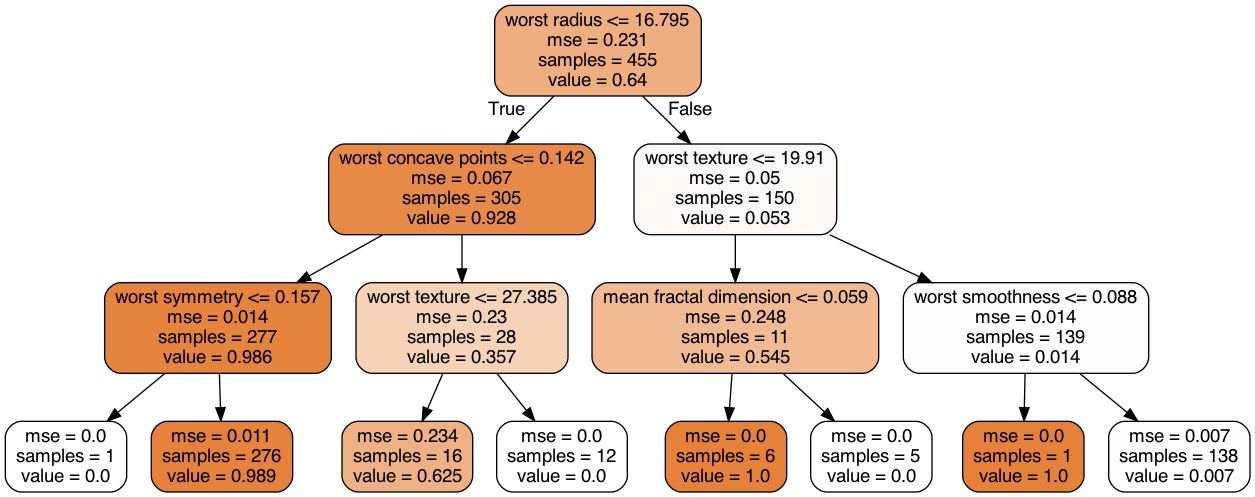

In [15]:
Image("reg.png")

## Resultados no conjunto treino

In [16]:
X_treino['previsao_maligno'] = tree_reg.predict(X_treino)
r2_treino = r2_score(y_treino,X_treino['previsao_maligno'])
print('R2 no conjunto treino %.3f' %r2_treino)

R2 no conjunto treino 0.926


/Users/tiagocaruso/learning/intro_aprendizado_maquina/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Ver resultados no conjunto teste

In [17]:
X_teste['previsao_benigno'] = tree_reg.predict(X_teste)
r2_teste = r2_score(y_teste,X_teste['previsao_benigno'])
print('R2 no conjunto treino %.3f' %r2_teste)

R2 no conjunto treino 0.769


/Users/tiagocaruso/learning/intro_aprendizado_maquina/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Floresta Aleatória

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data, cancer['target'], test_size=0.20, random_state=12)

In [19]:
rf_reg = RandomForestRegressor(n_estimators=120, max_depth=3, random_state=10)
rf_reg.fit(X_treino, y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [20]:
# X_treino['rf_previsao_benigno'] = rf_reg.predict(X_treino)
X_teste['rf_previsao_benigno'] = rf_reg.predict(X_teste)

/Users/tiagocaruso/learning/intro_aprendizado_maquina/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
R2_teste = r2_score(y_teste,X_teste['rf_previsao_benigno'])
print('R2 no conjunto teste foi %.3f' %R2_teste)

R2 no conjunto teste foi 0.797


In [22]:
rf_reg.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1165313289, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1283169405, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=89128932, splitter='best'),
 DecisionTreeRegressor(criteri

In [23]:
print(len(rf_reg.estimators_))
rf_tree = rf_reg.estimators_[1]

120


In [24]:
export_graphviz(rf_tree, feature_names=X_treino.columns, out_file='rf_tree.dot',rounded=True, filled=True)

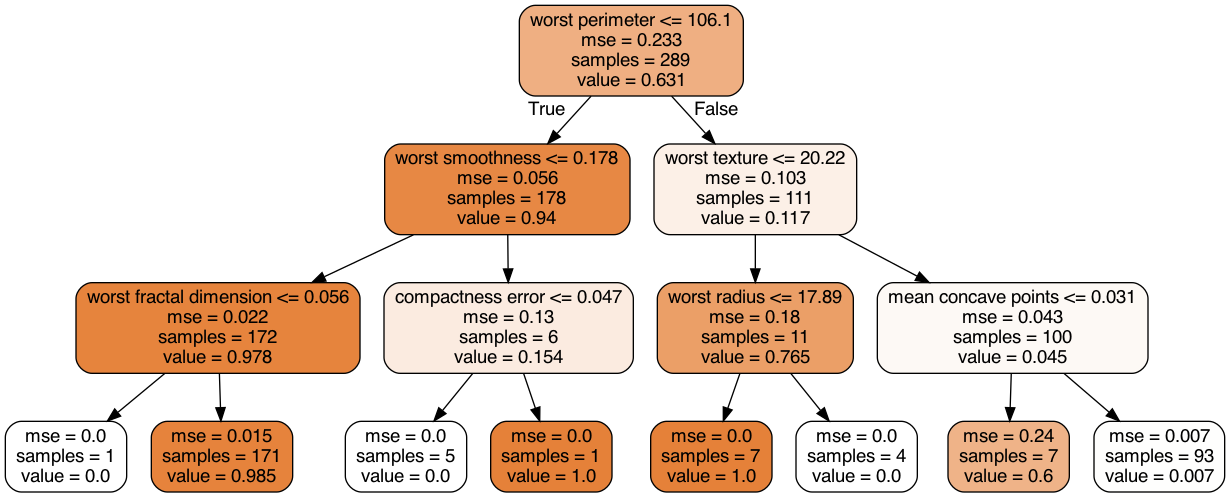

In [25]:
Image("rf_tree.png")